<font face = 'Times New Roman' size=5 color = #462323>Setup Environment

In [1]:
import pandas as pd
import math
import os
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import *
from collections import Counter
from sklearn.model_selection import train_test_split

<font face = 'Times New Roman' size=5 color = #462323>a. Setup Dataset

In [2]:
df = pd.read_csv('../data/data_used.dat',sep =' ',header=None)
df.columns=['Pelvic_incidence','Pelviv_tilt','Lumbar_lardosis_angle','Sacral_slope','Pelvic_radius','Grade_of_spondylolisthesis','Class']
df.replace('AB','1',inplace = True)
df.replace('NO', '0', inplace = True)
df = df.astype({'Class':int})
df

,Pelvic_incidence,Pelviv_tilt,Lumbar_lardosis_angle,Sacral_slope,Pelvic_radius,Grade_of_spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


<font face = 'Times New Roman' size=5 color = #462323> b. Pre-Processing and Exploratory data analysis

<font face = 'Times New Roman' size=4 color = #462323> i. Scatterplots - Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

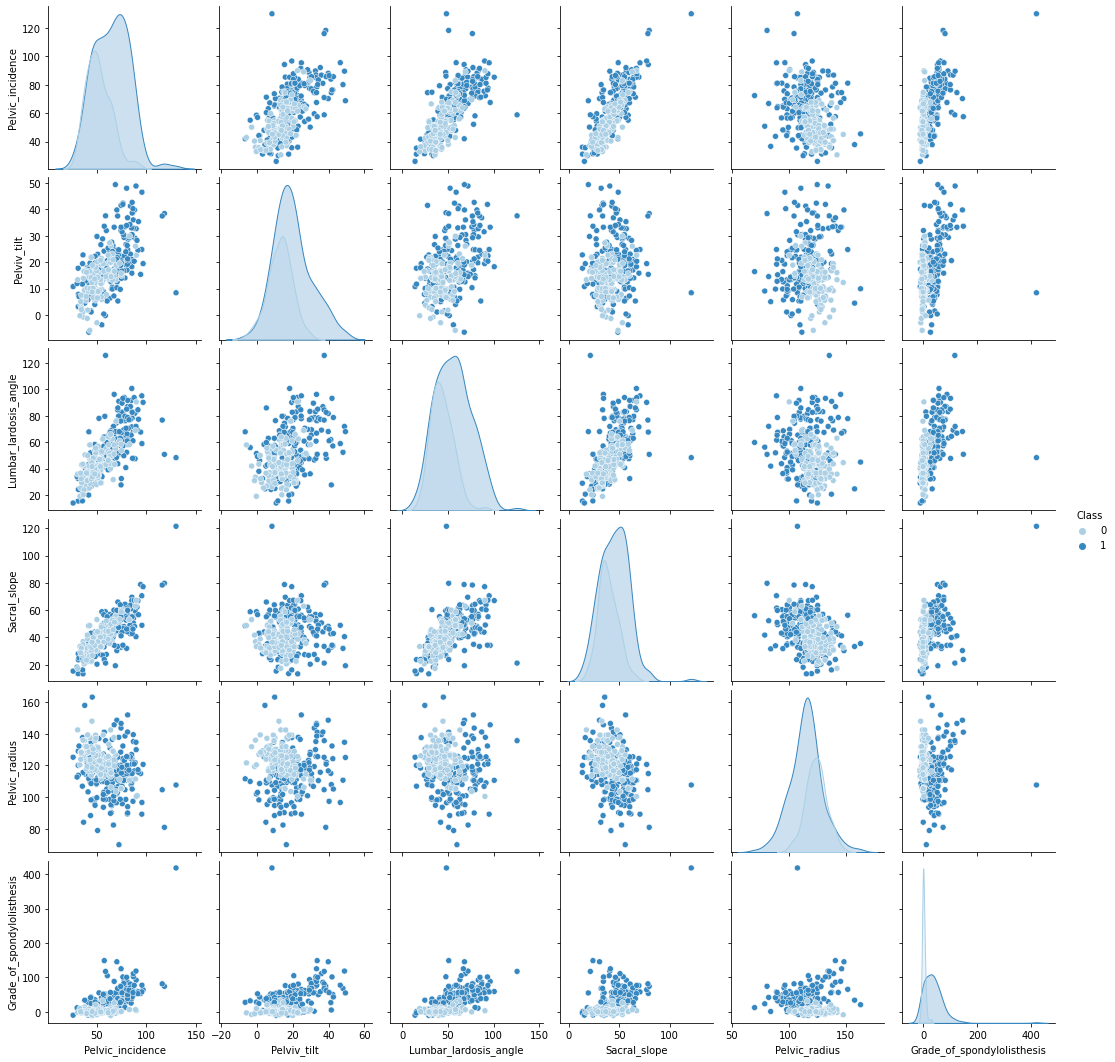

In [3]:
sns.pairplot(df, hue = 'Class',palette = 'Blues')


<font face = 'Times New Roman' size=4 color = #462323> ii. Boxplots - Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

<AxesSubplot:xlabel='Class', ylabel='Pelvic_incidence'>

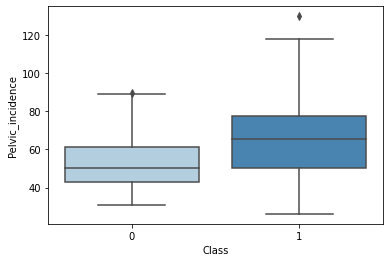

In [4]:
sns.boxplot(data=df, x='Class',y='Pelvic_incidence', palette = 'Blues')

<AxesSubplot:xlabel='Class', ylabel='Pelviv_tilt'>

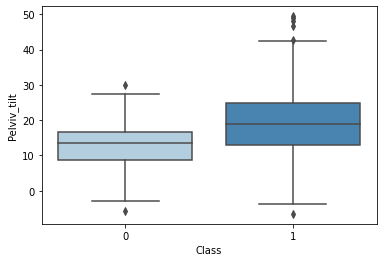

In [5]:
sns.boxplot(data=df, x='Class',y='Pelviv_tilt', palette = 'Blues')

<AxesSubplot:xlabel='Class', ylabel='Lumbar_lardosis_angle'>

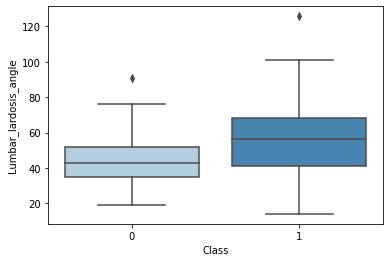

In [6]:
sns.boxplot(data=df, x='Class',y='Lumbar_lardosis_angle', palette = 'Blues')

<AxesSubplot:xlabel='Class', ylabel='Sacral_slope'>

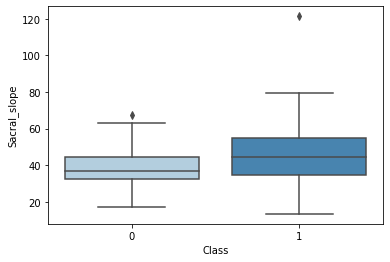

In [7]:
sns.boxplot(data=df, x='Class',y='Sacral_slope', palette = 'Blues')

<AxesSubplot:xlabel='Class', ylabel='Pelvic_radius'>

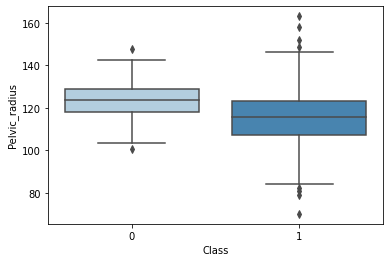

In [8]:
sns.boxplot(data=df, x='Class',y='Pelvic_radius', palette = 'Blues')

<AxesSubplot:xlabel='Class', ylabel='Grade_of_spondylolisthesis'>

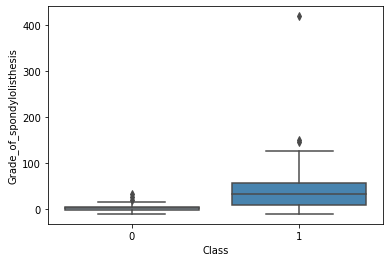

In [9]:
sns.boxplot(data=df, x='Class',y='Grade_of_spondylolisthesis', palette = 'Blues')

<font face = 'Times New Roman' size=4 color = #462323> iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [10]:
abnormal_totle= df[df['Class']==1]
abnormal_training =abnormal_totle[:140]
abnormal_test = abnormal_totle[140:]


normal_totle= df[df['Class']==0]
normal_training =normal_totle[:70]
normal_test = normal_totle[70:]

training = pd.concat([normal_training,abnormal_training])
test = pd.concat([normal_test,abnormal_test])

x_training = np.array(training[['Pelvic_incidence','Pelviv_tilt','Lumbar_lardosis_angle','Sacral_slope','Pelvic_radius','Grade_of_spondylolisthesis']])
y_training = np.array(training[['Class']])

x_test = np.array(test[['Pelvic_incidence','Pelviv_tilt','Lumbar_lardosis_angle','Sacral_slope','Pelvic_radius','Grade_of_spondylolisthesis']])
y_test = np.array(test[['Class']])

y_training_vec = y_training.reshape((1, -1))[0]
y_test_vec = y_test.reshape((1,-1))[0]


<font face = 'Times New Roman' size=5 color = #462323> c. Classification using KNN on Vertebral Column Data Set

<font face = 'Times New Roman' size=4 color = #462323> i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_training, y_training_vec)
y_pred = knn.predict(x_test)

<font face = 'Times New Roman' size=4 color = #462323>  ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k =k*

In [12]:
from sklearn import metrics
def knn_classifier (x_training, y_training_vec, x_test,y_test_vec,k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_training, y_training_vec)
    y_pred = knn.predict(x_test)
    return metrics.accuracy_score(y_test_vec,y_pred)

In [13]:
print (knn_classifier(x_training,y_training_vec,x_training, y_training_vec,3))

0.8952380952380953


In [14]:
k_range = range (208,1,-3)

training_error = []
for k in k_range:
    train_score = knn_classifier(x_training,y_training_vec,x_training, y_training_vec,k)
    training_error.append(1-train_score)

    
test_error = []
k_opt = 0
accu = 0
for k in k_range:
    test_score = knn_classifier(x_training,y_training_vec,x_test, y_test_vec,k)
    test_err = 1-test_score
    test_error.append(test_err)
    if test_score > accu:
        accu = test_score
        k_opt = k

print(k_opt)

4


Text(0, 0.5, 'error')

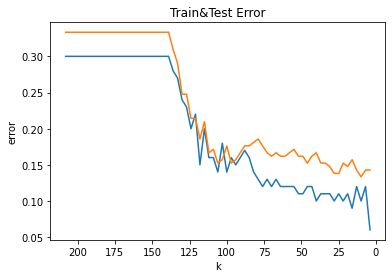

In [15]:
plt.plot(k_range, test_error)
plt.plot(k_range, training_error)

plt.gca().invert_xaxis()

plt.title("Train&Test Error") 
plt.xlabel("k")
plt.ylabel("error")

In [16]:
from sklearn.metrics import confusion_matrix, f1_score

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_training, y_training_vec)
y_pred = knn.predict(x_test)

matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()
tp_rate = tp/(tp+fn)
tn_rate = tn/(tn+fp)
precision = tp/(tp+fp)
f1 = f1_score(y_test,y_pred)
print('The confusion matrix is')
print (matrix)
print('true negative rate:',tn_rate)
print('true positive rate:',tp_rate)
print('precision:',precision)
print('f1 score:',f1)




The confusion matrix is
[[25  5]
 [ 1 69]]
true negative rate: 0.8333333333333334
true positive rate: 0.9857142857142858
precision: 0.9324324324324325
f1 score: 0.9583333333333333


<font face = 'Times New Roman' size=4 color = #462323>  c.iii. 
    

In [17]:
import math 

N_range = range(10,211,10)
abnormal_totle= df[df['Class']==1]
normal_totle= df[df['Class']==0]
test_error_at_k_opt = []
for N in N_range:
    fl=math.floor(N/3)
    abnormal_training =abnormal_totle[:(N-fl)]
    abnormal_test = abnormal_totle[140:]
    #abnormal_test = abnormal_totle[(N-fl):]
   
    normal_training =normal_totle[:fl]
    #normal_test = normal_totle[fl:]
    normal_test = normal_totle[70:]
    training = pd.concat([normal_training,abnormal_training])
    test = pd.concat([normal_test,abnormal_test])
    x_training = np.array(training[['Pelvic_incidence','Pelviv_tilt','Lumbar_lardosis_angle','Sacral_slope','Pelvic_radius','Grade_of_spondylolisthesis']])
    y_training = np.array(training[['Class']])
    x_test = np.array(test[['Pelvic_incidence','Pelviv_tilt','Lumbar_lardosis_angle','Sacral_slope','Pelvic_radius','Grade_of_spondylolisthesis']])
    y_test = np.array(test[['Class']])
    y_training_vec = y_training.reshape((1, -1))[0]
    y_test_vec = y_test.reshape((1,-1))[0]
    
    k_opt = 0
    accu = 0
    k_range = (1,N,5)
    for k in k_range:
        test_score = knn_classifier(x_training,y_training_vec,x_test, y_test_vec,k)
        if test_score > accu:
            accu = test_score
            k_opt = k
        
    test_error = 1- knn_classifier(x_training,y_training_vec,x_test, y_test_vec,k_opt)
    test_error_at_k_opt.append(test_error)




Text(0, 0.5, 'test error')

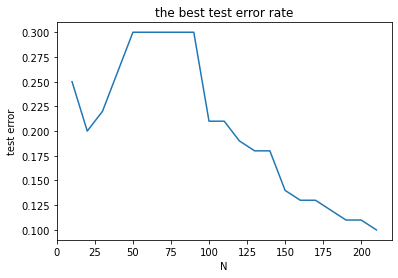

In [18]:
plt.plot(N_range, test_error_at_k_opt)


plt.title("the best test error rate") 
plt.xlabel("N")
plt.ylabel("test error")


<font face = 'Times New Roman' size=5 color = #462323> d.Replace the Euclidean metric with the following metrics and test them

<font face = 'Times New Roman' size=4 color = #462323> d.i.A

In [19]:
abnormal_totle= df[df['Class']==1]
abnormal_training =abnormal_totle[:140]
abnormal_test = abnormal_totle[140:]


normal_totle= df[df['Class']==0]
normal_training =normal_totle[:70]
normal_test = normal_totle[70:]

training = pd.concat([normal_training,abnormal_training])
test = pd.concat([normal_test,abnormal_test])

x_training = np.array(training[['Pelvic_incidence','Pelviv_tilt','Lumbar_lardosis_angle','Sacral_slope','Pelvic_radius','Grade_of_spondylolisthesis']])
y_training = np.array(training[['Class']])

x_test = np.array(test[['Pelvic_incidence','Pelviv_tilt','Lumbar_lardosis_angle','Sacral_slope','Pelvic_radius','Grade_of_spondylolisthesis']])
y_test = np.array(test[['Class']])

y_training_vec = y_training.reshape((1, -1))[0]
y_test_vec = y_test.reshape((1,-1))[0]


In [20]:
def knn_classifier_M (x_training, y_training_vec, x_test,y_test_vec,k):
    knn = KNeighborsClassifier(n_neighbors = k,p=1)
    knn.fit(x_training, y_training_vec)
    y_pred = knn.predict(x_test)
    return metrics.accuracy_score(y_test_vec,y_pred)


In [21]:
k_range_M = range(1,200,5)
#test_error = []
k_opt_M = 0
accu = 0
for k in k_range_M:
    test_score = knn_classifier_M(x_training,y_training_vec,x_test, y_test_vec,k)
    test_err = 1-test_score
    #test_error.append(test_err)
    if test_score > accu:
        accu = test_score
        k_opt_M = k

print('best k with Manhattan Distance = ',k_opt_M)


best k with Manhattan Distance =  6


<font face = 'Times New Roman' size=4 color = #462323> d.i.B

In [22]:
def knn_classifier_log (x_training, y_training_vec, x_test,y_test_vec,pi):
    knn = KNeighborsClassifier(n_neighbors =6,p=pi)
    knn.fit(x_training, y_training_vec)
    y_pred = knn.predict(x_test)
    return metrics.accuracy_score(y_test_vec,y_pred)

In [23]:
pp = range(1,11,1)
p_list = []
for ppp in pp:
    p_list.append(10**(ppp/10))

In [24]:
p_score =0
accu = 0
for p in p_list:
    test_score = knn_classifier_log(x_training,y_training_vec,x_test, y_test_vec,p)
    test_err = 1-test_score
    if test_score >= accu:
        accu = test_score
        p_score = p
logp = math.log10(p_score)
print ('the best log(base10,p) is',logp)

the best log(base10,p) is 0.6


<font face = 'Times New Roman' size=4 color = #462323> d.i.C

In [25]:
def knn_classifier_C(x_training, y_training_vec, x_test,y_test_vec,k):
    knn = KNeighborsClassifier(n_neighbors = k,metric='chebyshev')
    knn.fit(x_training, y_training_vec)
    y_pred = knn.predict(x_test)
    return metrics.accuracy_score(y_test_vec,y_pred)

In [26]:
k_range_C = range(1,200,5)

k_opt_C = 0
accu = 0
for k in k_range_C:
    test_score = knn_classifier_C(x_training,y_training_vec,x_test, y_test_vec,k)
    test_err = 1-test_score
    #test_error.append(test_err)
    if test_score > accu:
        accu = test_score
        k_opt_C = k

print('the best k with Chebyshev Distance = ',k_opt_C)


the best k with Chebyshev Distance =  16


<font face = 'Times New Roman' size=4 color = #462323> d.ii

In [27]:
def knn_classifier_Maha(x_training, y_training_vec, x_test,y_test_vec,k):
    covariance = np.cov(x_training)
    inv = np.linalg.inv(covariance)
    knn = KNeighborsClassifier(n_neighbors = k,metric='mahalanobis',metric_params={'VI':inv},algorithm = 'brute')
    knn.fit(x_training, y_training_vec)
    y_pred = knn.predict(x_test)
    return metrics.accuracy_score(y_test_vec,y_pred)


In [28]:
k_range_Maha = range(1,200,5)
k_opt_Maha = 0
accu = 0
for k in k_range_Maha:
    test_score = knn_classifier_Maha(x_training,y_training_vec,x_test, y_test_vec,k)
    test_err = 1-test_score
    #test_error.append(test_err)
    if test_score > accu:
        accu = test_score
        k_opt_Maha = k

print('the best k with Mahalanobis Distance = ',k_opt_Maha)

the best k with Mahalanobis Distance =  6


<font face = 'Times New Roman' size=4 color = #462323> summarization of test error

In [29]:
Manhattan = 1-knn_classifier_M(x_training,y_training_vec,x_test, y_test_vec,k_opt_M)
log10p = 1-knn_classifier_log(x_training,y_training_vec,x_test, y_test_vec,p_score)
Chebyshev = 1-knn_classifier_C(x_training,y_training_vec,x_test, y_test_vec,k_opt_C)
Mahalanobis = 1-knn_classifier_Maha(x_training,y_training_vec,x_test, y_test_vec,k_opt_Maha)

table = pd.DataFrame({'Manhattan':[Manhattan],'log10p':[log10p],'Chebyshev':[Chebyshev],'Mahalanobis':[Mahalanobis]})
table.index.name = 'the test errors'
table

,Manhattan,log10p,Chebyshev,Mahalanobis
the test errors,,,,
0,0.11,0.06,0.08,0.21


<font face = 'Times New Roman' size=5 color = #462323> e.weight decision

In [30]:
def knn_classifier_w(x_training, y_training_vec, x_test,y_test_vec,k):
    knn = KNeighborsClassifier(n_neighbors = k,weights = 'distance')
    knn.fit(x_training, y_training_vec)
    y_pred = knn.predict(x_test)
    return metrics.accuracy_score(y_test_vec,y_pred)

def knn_classifier_M_w(x_training, y_training_vec, x_test,y_test_vec,k):
    knn = KNeighborsClassifier(n_neighbors = k,p=1,weights = 'distance')
    knn.fit(x_training, y_training_vec)
    y_pred = knn.predict(x_test)
    return metrics.accuracy_score(y_test_vec,y_pred)

def knn_classifier_C_w(x_training, y_training_vec, x_test,y_test_vec,k):
    knn = KNeighborsClassifier(n_neighbors = k,metric='chebyshev',weights = 'distance')
    knn.fit(x_training, y_training_vec)
    y_pred = knn.predict(x_test)
    return metrics.accuracy_score(y_test_vec,y_pred)

In [31]:
k_range = range(1,200,5)
k_euc = 0
k_man = 0
k_che = 0
accu_euc = 0
accu_man = 0
accu_che = 0
for k in k_range:
    test_score = knn_classifier_w(x_training,y_training_vec,x_test, y_test_vec,k)
    test_err = 1-test_score
    if test_score > accu_euc:
        accu_euc = test_score
        k_euc = k
error_euc = 1- knn_classifier_w(x_training,y_training_vec,x_test, y_test_vec,k_euc)

for k in k_range:
    test_score = knn_classifier_M_w(x_training,y_training_vec,x_test, y_test_vec,k)
    test_err = 1-test_score
    if test_score > accu_man:
        accu_man = test_score
        k_man = k
error_man = 1- knn_classifier_M_w(x_training,y_training_vec,x_test, y_test_vec,k_man)

for k in k_range:
    test_score = knn_classifier_C_w(x_training,y_training_vec,x_test, y_test_vec,k)
    test_err = 1-test_score
    if test_score > accu_che:
        accu_che = test_score
        k_che = k
error_che = 1- knn_classifier_C_w(x_training,y_training_vec,x_test, y_test_vec,k_che)
print('the best test error with Euclidean distance is',error_euc)
print('the best test error with Manhattan distance is',error_man)
print('the best test error with Chebyshev distance is',error_che)
        

the best test error with Euclidean distance is 0.09999999999999998
the best test error with Manhattan distance is 0.09999999999999998
the best test error with Chebyshev distance is 0.10999999999999999


<font face = 'Times New Roman' size=5 color = #462323> f.What is the lowest training error rate you achieved in this homework?

0